In [ ]:
!pip install rapidfuzz

In [ ]:
#Considerar las variables top 5 amenities (price(y) = room_type + beds + bedrooms + bathrooms + amenity1 + … + amenity4 + volume_reviews + sentimal score)

In [ ]:
import pandas as pd
from rapidfuzz import fuzz
import re
import numpy as np

In [ ]:
listings_df = pd.read_csv("https://media.githubusercontent.com/media/AdrianaRODA/4Geeks_NLP_Airbnb_Reviews/refs/heads/main/Data/listings.csv")

In [ ]:
listings_df_filt = listings_df[['id','room_type','beds','bedrooms','bathrooms','price','amenities']].copy()
listings_df_filt

,id,room_type,beds,bedrooms,bathrooms,price,amenities
0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p..."
1,44616,Entire home/apt,NaN,5.0,NaN,NaN,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin..."
2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ..."
3,67703,Entire home/apt,NaN,2.0,NaN,NaN,"[""Hangers"", ""Extra pillows and blankets"", ""Wif..."
4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e..."
...,...,...,...,...,...,...,...
26062,1379327529227113949,Shared room,4.0,NaN,1.0,$529.00,"[""Fire extinguisher"", ""Carbon monoxide alarm"",..."
26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex..."
26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb..."
26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen..."


In [ ]:
print(listings_df_filt.shape)
listings_df_filt.isnull().sum()

(26067, 7)


,0
id,0
room_type,0
beds,4022
bedrooms,971
bathrooms,4005
price,3999
amenities,0


In [ ]:
listings_df_filt.dropna(inplace=True)
listings_df_filt.shape

(21990, 7)

In [ ]:
def drop_blank(string):
  unique = []
  for word in string.split(","):
    unique.append(word.lstrip().strip())
  return ','.join(unique)

In [ ]:
listings_df_filt['AMENITIES'] = listings_df_filt['amenities'].apply(lambda x: drop_blank( ",".join(re.sub("\"", " ", x[1:-1]).split(","))))

In [ ]:
listings_df_filt

,id,room_type,beds,bedrooms,bathrooms,price,amenities,AMENITIES
0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","Wifi,Garden view,Pocket wifi,Free parking on p..."
2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...","Wine glasses,Hangers,Cooking basics,Microwave,..."
4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e...","Wine glasses,Portable heater,Private entrance,..."
6,165772,Entire home/apt,10.0,5.0,5.0,"$3,982.00","[""Children\u2019s books and toys"", ""Pocket wif...","Children\u2019s books and toys,Pocket wifi,Hai..."
7,171109,Private room,1.0,1.0,1.0,$327.00,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...","Hair dryer,Hangers,Microwave,Cooking basics,Pa..."
...,...,...,...,...,...,...,...,...
26059,1379315240048015080,Entire home/apt,3.0,2.0,2.0,$720.00,"[""Wifi"", ""Kitchen"", ""Carbon monoxide alarm"", ""...","Wifi,Kitchen,Carbon monoxide alarm,TV,Dedicate..."
26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex...","Hangers,Cooking basics,Microwave,Exercise equi..."
26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb...","Wifi,Fire extinguisher,Kitchen,Carbon monoxide..."
26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen...","Wine glasses,Hair dryer,Hangers,Central heatin..."


In [ ]:
listings_df_filt.loc[:, 'AMENITIES'] = listings_df_filt['AMENITIES'].str.lower()
listings_df_filt

,id,room_type,beds,bedrooms,bathrooms,price,amenities,AMENITIES
0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","wifi,garden view,pocket wifi,free parking on p..."
2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...","wine glasses,hangers,cooking basics,microwave,..."
4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e...","wine glasses,portable heater,private entrance,..."
6,165772,Entire home/apt,10.0,5.0,5.0,"$3,982.00","[""Children\u2019s books and toys"", ""Pocket wif...","children\u2019s books and toys,pocket wifi,hai..."
7,171109,Private room,1.0,1.0,1.0,$327.00,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...","hair dryer,hangers,microwave,cooking basics,pa..."
...,...,...,...,...,...,...,...,...
26059,1379315240048015080,Entire home/apt,3.0,2.0,2.0,$720.00,"[""Wifi"", ""Kitchen"", ""Carbon monoxide alarm"", ""...","wifi,kitchen,carbon monoxide alarm,tv,dedicate..."
26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex...","hangers,cooking basics,microwave,exercise equi..."
26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb...","wifi,fire extinguisher,kitchen,carbon monoxide..."
26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen...","wine glasses,hair dryer,hangers,central heatin..."


In [ ]:
listings_df_filt['AMENITIES'] = listings_df_filt['AMENITIES'].str.replace(r'[^a-zA-Z\s,áéíóúüñÁÉÍÓÚÜÑ]', '', regex=True)
listings_df_filt['AMENITIES']

,AMENITIES
0,"wifi,garden view,pocket wifi,free parking on p..."
2,"wine glasses,hangers,cooking basics,microwave,..."
4,"wine glasses,portable heater,private entrance,..."
6,"childrenus books and toys,pocket wifi,hair dry..."
7,"hair dryer,hangers,microwave,cooking basics,pa..."
...,...
26059,"wifi,kitchen,carbon monoxide alarm,tv,dedicate..."
26063,"hangers,cooking basics,microwave,exercise equi..."
26064,"wifi,fire extinguisher,kitchen,carbon monoxide..."
26065,"wine glasses,hair dryer,hangers,central heatin..."


In [ ]:
unary = []
for row in listings_df_filt['AMENITIES']:
  for word in row.split(","):
    if word not in unary:
      unary.append(word)
unary

['wifi',
 'garden view',
 'pocket wifi',
 'free parking on premises',
 'resort access',
 'kitchen',
 'washer',
 'bed linens',
 'hot water',
 'courtyard view',
 'bbq grill',
 'indoor fireplace',
 'wine glasses',
 'hangers',
 'cooking basics',
 'microwave',
 'extra pillows and blankets',
 'self checkin',
 'elevator',
 'luggage dropoff allowed',
 'coffee maker keurig coffee machine',
 'iron',
 'building staff',
 'dining table',
 'cleaning products',
 'paid parking on premises',
 'shampoo',
 'stove',
 'refrigerator',
 'freezer',
 'oven',
 'long term stays allowed',
 'dishes and silverware',
 'essentials',
 'smoking allowed',
 'tv',
 'portable heater',
 'private entrance',
 'hair dryer',
 'coffee maker drip coffee maker',
 'nespresso',
 'mini fridge',
 'varies body soap',
 'smoke alarm',
 'clothing storage',
 'toaster',
 'fire extinguisher',
 'cleaning available during stay',
 'outdoor furniture',
 'roomdarkening shades',
 'free street parking',
 'safe',
 'hot water kettle',
 'shower gel',


In [ ]:
categorias = {
    "wifi": ["wifi", "internet", "wifi rápido","ethernet"],
    "tv": ["tv", "pantalla", "pantalla plana","hdtv","dvd"],
    "cocina basica":["glass","microwave","silverware","dishes","kitchen","stove","cooking basics", "cooking","coffee maker","nespresso","french press"],
    "refrigerador":["mini fridge","fridge","refri", "refrigerador", "nevera","refrigerator","freezer"],
    "cocina extra":["bread","toaster","wine glass","oven","horno","blender","dinnerware"],
    "basicos baño" :["shampoo", "jabón", "acondicionador","conditioner","soap","shower gel","shower"],
    "belleza":["hair dryer"],
    "servicio limpieza" : ["housekeeping", "limpieza","cleaning"],
    "estacionamiento" :["estacionamiento", "parking","free parking"],
    "centro lavado":["lavadora","washer","dryer",'laundromat'],
    "sound system":["sound system","sonido"],
    "bbq grill":["bbq"],
    "basicos cuarto":["linens","pillows","clothing","closet","wardrobe","covers"],
    "pool":["pool","jacuzzi"],
    "consola":["nintendo", "console","arcade"],
    "streaming":["netfilx","hbo","disney","streaming","chromecast","roku","amazon","prime video","hulu"],
    "chimenea":["fireplace","chimenea"],
    "espacio de trabajo":["dedicated workspace"],
    "cortinas":["shades"],
    "seguridad externa":["security","cameras","lock","safe","guards","alarm","keypad","private","entrance"],
    "seguridad interna":["first aid","monoxide","smoke","lockbox",'luggage',"storage"],
    "ambiente":["heating","AC","fan","air conditioner"],
    "baño equipado":["bathtub","tub","sauna","bidet"],
    "ejercicio":["gym","exercise","weights","treadmill","yoga","elliptical","workout","bike","clamp seat"],
    "exterior":["patio","balcony","garden","backyard","outdoor","courtyard","fire pit","rooftop","ping pong"],
    "extras":["hangers","iron","mosquito net","decibel"],
    "niños":["baby","babysitter","toys","playground","childrens","cuna","crib"]
}

keys_list = list(categorias.keys())
keys_list

['wifi',
 'tv',
 'cocina basica',
 'refrigerador',
 'cocina extra',
 'basicos baño',
 'belleza',
 'servicio limpieza',
 'estacionamiento',
 'centro lavado',
 'sound system',
 'bbq grill',
 'basicos cuarto',
 'pool',
 'consola',
 'streaming',
 'chimenea',
 'espacio de trabajo',
 'cortinas',
 'seguridad externa',
 'seguridad interna',
 'ambiente',
 'baño equipado',
 'ejercicio',
 'exterior',
 'extras',
 'niños']

In [ ]:
def clasificar_amenidad(amenidad, categorias, threshold=80):
    mejor_categoria = None
    mejor_score = 0
    for categoria, ejemplos in categorias.items():
        for ejemplo in ejemplos:
            score = fuzz.partial_ratio(amenidad.lower(), ejemplo.lower())
            if score > mejor_score:
                mejor_score = score
                mejor_categoria = categoria
    return mejor_categoria if mejor_score >= threshold else amenidad.strip()

def procesar_fila(fila):
    frases = [x.strip() for x in fila.split(",")]
    resultado = set()
    for f in frases:
        resultado.add(clasificar_amenidad(f, categorias))
    return ", ".join(sorted(resultado))





In [ ]:
listings_df_filt['categorias_estandar'] = listings_df_filt['AMENITIES'].apply(procesar_fila)


In [ ]:
listings_df_filt['categorias_estandar'][0]

'ambiente, basicos cuarto, bbq grill, centro lavado, chimenea, cocina basica, estacionamiento, exterior, streaming, wifi'

In [ ]:
#listings_df_filt.head()

In [ ]:
unary2 = []
for row in listings_df_filt['categorias_estandar']:
  for word in row.split(","):
    if word not in unary2:
      unary2.append(word)

In [ ]:
len(unary2)


173

In [ ]:
unary2

['ambiente',
 ' basicos cuarto',
 ' bbq grill',
 ' centro lavado',
 ' chimenea',
 ' cocina basica',
 ' estacionamiento',
 ' exterior',
 ' streaming',
 ' wifi',
 'basicos baño',
 ' building staff',
 ' cocina extra',
 ' dining table',
 ' elevator',
 ' essentials',
 ' extras',
 ' long term stays allowed',
 ' refrigerador',
 ' seguridad interna',
 ' self checkin',
 ' servicio limpieza',
 ' tv',
 ' baño equipado',
 ' belleza',
 ' consola',
 ' cortinas',
 ' espacio de trabajo',
 ' portable heater',
 ' seguridad externa',
 ' basicos baño',
 ' high chair',
 ' niños',
 ' pets allowed',
 ' baking sheet',
 ' barbecue utensils',
 ' sound system',
 ' premium cable',
 ' single level home',
 ' city skyline view',
 'belleza',
 'basicos cuarto',
 ' ejercicio',
 ' record player',
 ' standard cable',
 ' pool',
 ' open specific hours',
 'centro lavado',
 ' park view',
 ' piano',
 ' mountain view',
 ' olympicsized',
 ' open  hours',
 '',
 ' pourover coffee',
 ' valley view',
 ' high chair  available upon r

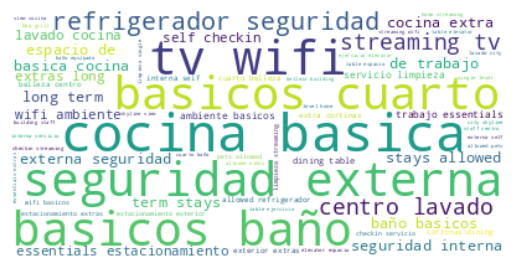

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", repeat=True)
text_for_wordcloud = " ".join(listings_df_filt['categorias_estandar'])
wc.generate(text_for_wordcloud)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
from collections import Counter
def process_text(text):
    words = text.split()
    frequencies = Counter(words)
    for word, count in frequencies.most_common():
        print(f"'{word}': {count} times")

In [ ]:
process_text(text_for_wordcloud)
np.unique(text_for_wordcloud.split(' '))

'seguridad': 35666 times
'cocina': 35247 times
'basicos': 35028 times
'wifi': 21683 times
'basica,': 20939 times
'externa,': 20295 times
'allowed,': 19924 times
'streaming,': 18820 times
'tv,': 18692 times
'extras,': 18669 times
'baño,': 18083 times
'refrigerador,': 17355 times
'essentials,': 17012 times
'cuarto,': 16945 times
'centro': 15995 times
'lavado,': 15995 times
'estacionamiento,': 15674 times
'interna,': 15329 times
'de': 15246 times
'espacio': 15232 times
'trabajo,': 15229 times
'belleza,': 14537 times
'extra,': 14306 times
'long': 13810 times
'term': 13810 times
'stays': 13810 times
'ambiente,': 12686 times
'self': 12238 times
'checkin,': 12226 times
'cortinas,': 11659 times
'servicio': 11144 times
'limpieza,': 11140 times
'table,': 10725 times
'dining': 10576 times
'exterior,': 10113 times
'elevator,': 7777 times
'pets': 6115 times
'ejercicio,': 4830 times
'niños,': 4754 times
'single': 4145 times
'level': 4145 times
'home,': 4145 times
'view,': 3837 times
'building': 3511

array(['', 'a', 'abeja', 'aire,', 'all', 'allowed', 'allowed,', 'always',
       'ambiente,', 'amenidades', 'and', 'at', 'available', 'baking',
       'barbecue', 'basica', 'basica,', 'basicos', 'batting', 'baufo',
       'baño', 'baño,', 'bbq', 'belleza,', 'building', 'cable,', 'cage,',
       'canal', 'cd', 'centro', 'chair', 'chair,', 'changing', 'charger',
       'charger,', 'checkin', 'checkin,', 'chimenea,', 'city', 'clamp',
       'climbing', 'cocina', 'coco', 'coffee,', 'colocan', 'con',
       'consola,', 'cortinas,', 'course', 'cuarto,', 'day', 'days', 'de',
       'desert', 'dial,', 'diferente', 'dining', 'dispensador,', 'dogo,',
       'ejercicio', 'ejercicio,', 'electric,', 'elevator,', 'elvive,',
       'equipado,', 'es', 'espacio', 'essences,', 'essentials,',
       'estacionamiento', 'estacionamiento,', 'estufas,', 'ethanol,',
       'ev', 'exterior', 'exterior,', 'externa', 'externa,', 'extra,',
       'extras,', 'friday', 'frie', 'games,', 'golf', 'goods,', 'grill',
 

In [ ]:

#for var in unary2:
 # listings_df_filt[var] = 0
  #for index in listings_df_filt.index:
   # if var in listings_df_filt.loc[index,'categorias_estandar']:
    #  listings_df_filt.loc[index, var] = 1

In [ ]:
keys_list

nuevas_columnas = {}
for val in keys_list:
    nuevas_columnas[val] = listings_df_filt["categorias_estandar"].apply(lambda x: 1 if val in x else 0)

df_amenities_dum = pd.concat([listings_df_filt, pd.DataFrame(nuevas_columnas)], axis=1)


In [ ]:
pd.set_option('display.max_columns', None)
df_amenities_dum

,id,room_type,beds,bedrooms,bathrooms,price,amenities,AMENITIES,categorias_estandar,wifi,tv,cocina basica,refrigerador,cocina extra,basicos baño,belleza,servicio limpieza,estacionamiento,centro lavado,sound system,bbq grill,basicos cuarto,pool,consola,streaming,chimenea,espacio de trabajo,cortinas,seguridad externa,seguridad interna,ambiente,baño equipado,ejercicio,exterior,extras,niños
0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","wifi,garden view,pocket wifi,free parking on p...","ambiente, basicos cuarto, bbq grill, centro la...",1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0
2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...","wine glasses,hangers,cooking basics,microwave,...","basicos baño, basicos cuarto, building staff, ...",1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e...","wine glasses,portable heater,private entrance,...","basicos baño, basicos cuarto, baño equipado, b...",1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0
6,165772,Entire home/apt,10.0,5.0,5.0,"$3,982.00","[""Children\u2019s books and toys"", ""Pocket wif...","childrenus books and toys,pocket wifi,hair dry...","ambiente, basicos baño, basicos cuarto, bbq gr...",1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1
7,171109,Private room,1.0,1.0,1.0,$327.00,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...","hair dryer,hangers,microwave,cooking basics,pa...","basicos baño, belleza, centro lavado, cocina b...",1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,1379315240048015080,Entire home/apt,3.0,2.0,2.0,$720.00,"[""Wifi"", ""Kitchen"", ""Carbon monoxide alarm"", ""...","wifi,kitchen,carbon monoxide alarm,tv,dedicate...","cocina basica, espacio de trabajo, seguridad e...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex...","hangers,cooking basics,microwave,exercise equi...","ambiente, basicos baño, basicos cuarto, baño e...",1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0
26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb...","wifi,fire extinguisher,kitchen,carbon monoxide...","basicos baño, centro lavado, cocina basica, es...",1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen...","wine glasses,hair dryer,hangers,central heatin...","ambiente, basicos baño, basicos cuarto, bellez...",1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
df_encoded = pd.DataFrame(ohe.fit_transform(df_amenities_dum[["room_type"]]).toarray(),
                          columns=ohe.get_feature_names_out(['room_type']),
                          index =df_amenities_dum.index )

df_amenities_dum = pd.concat([df_amenities_dum, pd.DataFrame(df_encoded)], axis=1)
df_amenities_dum

#df_encoded = df_encoded.join(df_amenities_dum[list(set(df_amenities_dum.columns) - set("room_type"))])

,id,room_type,beds,bedrooms,bathrooms,price,amenities,AMENITIES,categorias_estandar,wifi,tv,cocina basica,refrigerador,cocina extra,basicos baño,belleza,servicio limpieza,estacionamiento,centro lavado,sound system,bbq grill,basicos cuarto,pool,consola,streaming,chimenea,espacio de trabajo,cortinas,seguridad externa,seguridad interna,ambiente,baño equipado,ejercicio,exterior,extras,niños,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","wifi,garden view,pocket wifi,free parking on p...","ambiente, basicos cuarto, bbq grill, centro la...",1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0
2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...","wine glasses,hangers,cooking basics,microwave,...","basicos baño, basicos cuarto, building staff, ...",1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1.0,0.0,0.0,0.0
4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e...","wine glasses,portable heater,private entrance,...","basicos baño, basicos cuarto, baño equipado, b...",1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1.0,0.0,0.0,0.0
6,165772,Entire home/apt,10.0,5.0,5.0,"$3,982.00","[""Children\u2019s books and toys"", ""Pocket wif...","childrenus books and toys,pocket wifi,hair dry...","ambiente, basicos baño, basicos cuarto, bbq gr...",1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1.0,0.0,0.0,0.0
7,171109,Private room,1.0,1.0,1.0,$327.00,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...","hair dryer,hangers,microwave,cooking basics,pa...","basicos baño, belleza, centro lavado, cocina b...",1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,1379315240048015080,Entire home/apt,3.0,2.0,2.0,$720.00,"[""Wifi"", ""Kitchen"", ""Carbon monoxide alarm"", ""...","wifi,kitchen,carbon monoxide alarm,tv,dedicate...","cocina basica, espacio de trabajo, seguridad e...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex...","hangers,cooking basics,microwave,exercise equi...","ambiente, basicos baño, basicos cuarto, baño e...",1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0.0,0.0,1.0,0.0
26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb...","wifi,fire extinguisher,kitchen,carbon monoxide...","basicos baño, centro lavado, cocina basica, es...",1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0
26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen...","wine glasses,hair dryer,hangers,central heatin...","ambiente, basicos baño, basicos cuarto, bellez...",1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1.0,0.0,0.0,0.0


In [ ]:
df_amenities_dum.to_csv("mi_dataframe.csv")

In [ ]:
pd.read_csv("mi_dataframe.csv")

,Unnamed: 0,id,room_type,beds,bedrooms,bathrooms,price,amenities,AMENITIES,categorias_estandar,wifi,tv,cocina basica,refrigerador,cocina extra,basicos baño,belleza,servicio limpieza,estacionamiento,centro lavado,sound system,bbq grill,basicos cuarto,pool,consola,streaming,chimenea,espacio de trabajo,cortinas,seguridad externa,seguridad interna,ambiente,baño equipado,ejercicio,exterior,extras,niños,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,35797,Entire home/apt,1.0,1.0,1.0,"$3,982.00","[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...","wifi,garden view,pocket wifi,free parking on p...","ambiente, basicos cuarto, bbq grill, centro la...",1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0
1,2,56074,Entire home/apt,1.0,1.0,1.0,$585.00,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...","wine glasses,hangers,cooking basics,microwave,...","basicos baño, basicos cuarto, building staff, ...",1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1.0,0.0,0.0,0.0
2,4,70644,Entire home/apt,1.0,1.0,1.0,"$1,015.00","[""Wine glasses"", ""Portable heater"", ""Private e...","wine glasses,portable heater,private entrance,...","basicos baño, basicos cuarto, baño equipado, b...",1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,1.0,0.0,0.0,0.0
3,6,165772,Entire home/apt,10.0,5.0,5.0,"$3,982.00","[""Children\u2019s books and toys"", ""Pocket wif...","childrenus books and toys,pocket wifi,hair dry...","ambiente, basicos baño, basicos cuarto, bbq gr...",1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1.0,0.0,0.0,0.0
4,7,171109,Private room,1.0,1.0,1.0,$327.00,"[""Hair dryer"", ""Hangers"", ""Microwave"", ""Cookin...","hair dryer,hangers,microwave,cooking basics,pa...","basicos baño, belleza, centro lavado, cocina b...",1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,26059,1379315240048015080,Entire home/apt,3.0,2.0,2.0,$720.00,"[""Wifi"", ""Kitchen"", ""Carbon monoxide alarm"", ""...","wifi,kitchen,carbon monoxide alarm,tv,dedicate...","cocina basica, espacio de trabajo, seguridad e...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
21986,26063,1379338090263773362,Private room,1.0,1.0,1.0,$472.00,"[""Hangers"", ""Cooking basics"", ""Microwave"", ""Ex...","hangers,cooking basics,microwave,exercise equi...","ambiente, basicos baño, basicos cuarto, baño e...",1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0.0,0.0,1.0,0.0
21987,26064,1379781424660291699,Private room,1.0,1.0,1.0,$399.00,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""Carb...","wifi,fire extinguisher,kitchen,carbon monoxide...","basicos baño, centro lavado, cocina basica, es...",1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0
21988,26065,1379807014531191212,Entire home/apt,1.0,1.0,1.0,"$1,494.00","[""Wine glasses"", ""Hair dryer"", ""Hangers"", ""Cen...","wine glasses,hair dryer,hangers,central heatin...","ambiente, basicos baño, basicos cuarto, bellez...",1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1.0,0.0,0.0,0.0
